### commands used

First we merged the english and tagalog together. We did this by running the following command: 


    cat english.test tagalog.test > r_9.test

After which we ran the following command
    
    java -jar negsel2.jar -self english.train -n 10 -r 9 -c -l < r_9.test > unsorted_r_9.test




In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics

In [32]:
unsorted = open('part1/unsorted.test')
lines = unsorted.read().split(' \n')
unsorted.close()
numbers = [float(a) for a  in lines[:-1]] #for some reason the last element of lines was a space


#unsorted = english + tagalog 
#english length = 124
#tagalog length = 708
#total   length = 832

#labeling data: 0=english, 1=tagalog

scores = np.zeros((832,2))
for i in range(len(scores)):
    scores[i][0] = numbers[i]
    if i<124:
        scores[i][1] = 0
    else: 
        scores[i][1] = 1 

        
#scores = list(reversed(sorted(scores, key=lambda x: x[0])))
scores = sorted(scores, key=lambda x: x[0])

In [35]:
def sen_spe(scores, norm1, norm2):
    sensitivities = []
    r_specificities = []
    
    for ind, score in enumerate(scores):
        #below the cutoff points
        below = scores[:ind]
        #above the cutoff points
        above = scores[ind+1:]
        
        #calculating the true negatives
        tn_num = len([item for item in below if item[1] == 0])
        
        #calculating the true postives
        tp_num = len([item for item in above if item[1] == 1])

        sensitivities.append(tp_num / norm1)
        r_specificities.append(1 - tn_num / norm2)
        
    return sensitivities, r_specificities

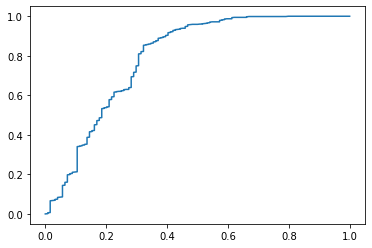

AUC: 0.7912224348459996


In [36]:
sens,spec = sen_spe(scores, 708, 124)
plt.plot(spec,sens)
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

### The following test are with r=9

In [27]:
unsorted = open('part1/unsorted_r_9.test')
lines = unsorted.read().split(' \n')
numbers = [float(a) for a  in lines[:-1]] #for some reason the last element of lines was a space

#unsorted = english + tagalog 
#english length = 124
#tagalog length = 708
#total   length = 832

#labeling data: 0=english, 1=tagalog

scores = np.zeros((832,2))
for i in range(len(scores)):
    scores[i][0] = numbers[i]
    if i<124:
        scores[i][1] = 0
    else: 
        scores[i][1] = 1 

scores = sorted(scores, key=lambda x: x[0])

In [28]:
print(np.min(scores, axis=0))
print(np.max(scores, axis=0))

[4.7548875 0.       ]
[5.7548875 1.       ]


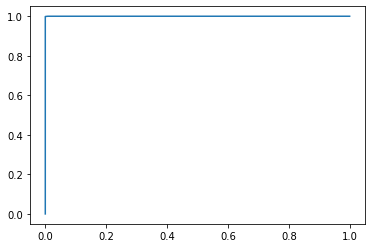

AUC: 0.9999943047202479


In [30]:
sens,spec = sen_spe(scores, 708, 124)
plt.plot(spec,sens)
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

### The following test are with r=1

In [ ]:
unsorted = open('unsorted_r_1.test')
lines = unsorted.read().split(' \n')
numbers = [float(a) for a  in lines[:-1]] #for some reason the last element of lines was a space


#unsorted = english + tagalog 
#english length = 124
#tagalog length = 708
#total   length = 832

#labeling data: 0=english, 1=tagalog

scores = np.zeros((832,2))
for i in range(len(scores)):
    scores[i][0] = numbers[i]
    if i<124:
        scores[i][1] = 0
    else: 
        scores[i][1] = 1 

scores = sorted(scores, key=lambda x: x[0])
#scores = sorted(scores, key=lambda x: x[0])

In [ ]:
sens,spec = sen_spe(scores, 708, 124)
plt.plot(spec,sens)
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

### 1.c 4 lanuages

#### English and hiligaynon with r=4 and n=10

In [64]:
unsorted = open('part1/unsorted_eng_hil.test')
lines = unsorted.read().split(' \n')
numbers = [float(a) for a  in lines[:-1]] #for some reason the last element of lines was a space


#unsorted = english + tagalog 
#english length = 124
#hiligaynon length = 500
#total   length = 624

#labeling data: 0=english, 1=tagalog

scores = np.zeros((624,2))
for i in range(len(scores)):
    scores[i][0] = numbers[i]
    if i<124:
        scores[i][1] = 0
    else: 
        scores[i][1] = 1 

scores = sorted(scores, key=lambda x: x[0])

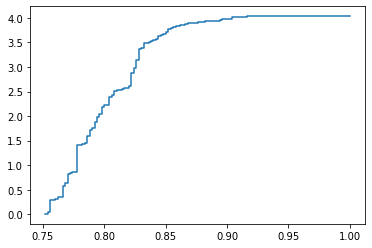

AUC: 0.7974677419354838


In [65]:
sens,spec = sen_spe(scores, 124, 500)
plt.plot(spec,sens)
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

#### English and middle english with r=4 and n=10

In [67]:
unsorted = open('part1/unsorted_eng_middle.test')
lines = unsorted.read().split(' \n')
numbers = [float(a) for a  in lines[:-1]] #for some reason the last element of lines was a space


#unsorted = english + tagalog 
#english length = 124
#middle english length = 500
#total   length = 624

#labeling data: 0=english, 1=tagalog

scores = np.zeros((624,2))
for i in range(len(scores)):
    scores[i][0] = numbers[i]
    if i<124:
        scores[i][1] = 0
    else: 
        scores[i][1] = 1 

scores = sorted(scores, key=lambda x: x[0])

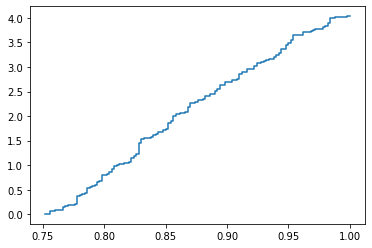

AUC: 0.5339032258064516


In [68]:
sens,spec = sen_spe(scores, 124, 500)
plt.plot(spec,sens)
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

In [75]:
unsorted = open('part1/unsorted_eng_pla.test')
lines = unsorted.read().split(' \n')
numbers = [float(a) for a  in lines[:-1]] #for some reason the last element of lines was a space

#unsorted = english + tagalog 
#english     length = 124
#pladeutisch length = 500
#total       length = 624

#labeling data: 0=english, 1=tagalog

scores = np.zeros((624,2))
for i in range(len(scores)):
    scores[i][0] = numbers[i]
    if i<124:
        scores[i][1] = 0
    else: 
        scores[i][1] = 1 

scores = sorted(scores, key=lambda x: x[0])

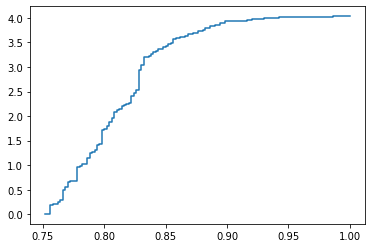

AUC: 0.7534032258064515


In [76]:
sens,spec = sen_spe(scores, 124, 500)
plt.plot(spec,sens)
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

In [78]:
unsorted = open('part1/unsorted_eng_xho.test')
lines = unsorted.read().split(' \n')
numbers = [float(a) for a  in lines[:-1]] #for some reason the last element of lines was a space


#unsorted = english + tagalog 
#english length = 124
#middle english length = 500
#total   length = 624

#labeling data: 0=english, 1=tagalog

scores = np.zeros((624,2))
for i in range(len(scores)):
    scores[i][0] = numbers[i]
    if i<124:
        scores[i][1] = 0
    else: 
        scores[i][1] = 1 

scores = sorted(scores, key=lambda x: x[0])

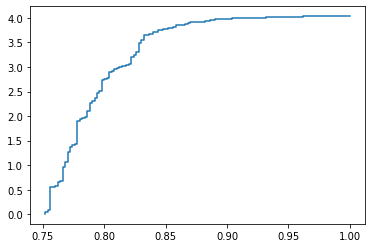

AUC: 0.8322741935483872


In [79]:
sens,spec = sen_spe(scores, 124, 500)
plt.plot(spec,sens)
plt.show()
print(f"AUC: {sklearn.metrics.auc(spec, sens)}")

### From this we can see that xho is the best